In [4]:
import os
import astropy
import numpy as np
from astropy.table import Table
from astropy.table import Column
import glob
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D

In [5]:
directory = r"C:\Users\20xha\Documents\Caltech\Research\SNID\snid_outputs\\"
final_rcf_table = Table.from_pandas(pd.read_hdf("C:/Users/20xha/Documents/Caltech/Research/final_rcf_table.h5"))
SEDM_ML_sample = Table.read("C:/Users/20xha/Documents/Caltech/Research/SEDM_ML_sample.ascii", format = "ascii")
SEDM_ML_sample.rename_column('col1', 'ZTF_Name')
SEDM_ML_sample.rename_column('col2', "Class")
SEDM_ML_sample.rename_column('col8', "Version")
run_list = os.listdir(r"C:\Users\20xha\Documents\Caltech\Research\SNID\snid_outputs/")[1::]

In [6]:
Table_List_Numpy = np.load("SNID_results_all_rlap3.npy", allow_pickle=True)

In [7]:
Max = 0
Min = 100
for i in Table_List_Numpy:
    Temp_Max = np.max(i[1]["rlap"])
    Temp_Min = np.min(i[1]["rlap"])
    if(Temp_Max > Max):
        Max = Temp_Max
    if(Temp_Min < Min):
        Min = Temp_Min
ranges = np.linspace(0, 25, 25)

In [ ]:
ResultsTable_List_both = []
count = 0

for rlap in ranges:
    for agree in range(0,16):
        ResultsTable = Table(
                    names=("ZTF_Name", "Both"
                    ),
                    meta={"name": "Spectrum Results after SNID"},
                    dtype=("U64", "U64"
                          )
                    )
        for j in Table_List_Numpy:
            row = []
            row.append(j[0])
            good = j[1][np.where(j[1]["grade"] == "good")]
            if(np.max(good["rlap"]) > rlap):
                Top15 = good[0:15]
                c = Counter(Top15["type"])
                if(c.most_common()[0][1] >= agree):
                    row.append(c.most_common()[0][0])
                    ResultsTable.add_row(row)

        count += 1
        if(len(ResultsTable) != 0):
            ResultsTable_List_both.append([rlap,agree,ResultsTable])
        if(count % 10 == 0):
            print(count)

In [10]:
ResultsTable_List_both_numpy = np.asarray(ResultsTable_List_both)

In [11]:
np.save("ResultsTable_List_both_numpy", ResultsTable_List_both_numpy)

In [12]:
ResultsTable_List_both_numpy = np.load("ResultsTable_List_both_numpy.npy", allow_pickle=True)

In [13]:
len(np.unique(Table_List_Numpy[:,0]))

2893

In [14]:
len(np.unique(SEDM_ML_sample["ZTF_Name"]))

2968

In [15]:
Classification = Table(
                    names=("ZTF_Name", "Class", "Version"
                    ),
                    meta={"name": "Basic ZTF Name Data"},
                    dtype=("U64", "U64", "U64"
                          )
                    )
for i in np.unique(SEDM_ML_sample["ZTF_Name"]):
    row = SEDM_ML_sample["ZTF_Name", "Class", "Version"][np.where(i == SEDM_ML_sample["ZTF_Name"])][-1]
    Classification.add_row(row)

In [16]:
counters_both = [] 
for i in ResultsTable_List_both_numpy:
    counter = 0
    wrong = []
    JoinedResults = astropy.table.join(i[2], Classification)
    for j in JoinedResults:
        if(j["Class"] != '-'):
            correct_1a = "Ia" in j["Class"]
            classified_1a = "Ia" in j["Both"]
            if(correct_1a==classified_1a):
                counter += 1
            else:
                wrong.append([j["ZTF_Name"], j["Class"], j["Both"]])
    wrong = np.asarray(wrong)
    counters_both.append([i[0],i[1],counter,len(JoinedResults), wrong])

In [17]:
counters_both = np.asarray(counters_both)

In [18]:
low_rlap = np.where(counters_both[:,0] < 20)
counters_both[low_rlap][np.argmax(counters_both[low_rlap][:,2]/counters_both[low_rlap][:,3])]

array([11.458333333333334, 15, 393, 393, array([], dtype=float64)],
      dtype=object)

In [19]:
counters_both[np.where(counters_both[:,2] == counters_both[:,3])]

array([[11.458333333333334, 15, 393, 393, array([], dtype=float64)],
       [12.5, 15, 347, 347, array([], dtype=float64)],
       [13.541666666666668, 14, 353, 353, array([], dtype=float64)],
       [13.541666666666668, 15, 296, 296, array([], dtype=float64)],
       [14.583333333333334, 9, 380, 380, array([], dtype=float64)],
       [14.583333333333334, 10, 363, 363, array([], dtype=float64)],
       [14.583333333333334, 11, 353, 353, array([], dtype=float64)],
       [14.583333333333334, 12, 344, 344, array([], dtype=float64)],
       [14.583333333333334, 13, 316, 316, array([], dtype=float64)],
       [14.583333333333334, 14, 285, 285, array([], dtype=float64)],
       [14.583333333333334, 15, 245, 245, array([], dtype=float64)],
       [15.625000000000002, 9, 294, 294, array([], dtype=float64)],
       [15.625000000000002, 10, 282, 282, array([], dtype=float64)],
       [15.625000000000002, 11, 273, 273, array([], dtype=float64)],
       [15.625000000000002, 12, 268, 268, array([]

Text(0.5, 0, 'accuracy')

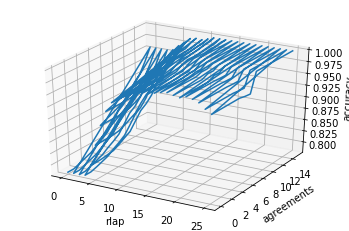

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(counters_both[:,0], counters_both[:,1], counters_both[:,2]/counters_both[:,3])
ax.set_xlabel("rlap")
ax.set_ylabel("agreements")
ax.set_zlabel("accuracy")

In [33]:
count = 0

rlap = 11.5
agree = 15
ResultsTable = Table(
            names=("ZTF_Name", "SNID_Class"
            ),
            meta={"name": "Spectrum Results after SNID"},
            dtype=("U64", "U64"
                  )
            )
for j in Table_List_Numpy:
    row = []
    row.append(j[0])
    good = j[1][np.where(j[1]["grade"] == "good")]
    if(np.max(good["rlap"]) > rlap):
        Top15 = good[0:15]
        c = Counter(Top15["type"])
        if(c.most_common()[0][1] >= agree):
            row.append(c.most_common()[0][0])
            ResultsTable.add_row(row)

count += 1
if(count% 100 == 0):
    print(count)

In [34]:
wrong = []
JoinedResults = astropy.table.join(ResultsTable, Classification)
for j in JoinedResults:
    if(j["Class"] != '-' and j["Class"] != "0.0"):
        correct_1a = "Ia" in j["Class"]
        classified_1a = "Ia" in j["SNID_Class"]
        if(correct_1a==classified_1a):
            counter += 1
        else:
            wrong.append([j["ZTF_Name"], j["Class"], j["SNID_Class"]])
wrong = np.asarray(wrong)

In [35]:
JoinedResults.to_pandas().to_csv("SNID_Results.csv")

In [36]:
wrong

array([], dtype=float64)

In [20]:
Table_List_Summary = []
count = 0
for i in np.unique(SEDM_ML_sample["ZTF_Name"]):
    row = []
    row.append(i)
    files = glob.glob(directory + i + "\\*.readableoutput")
    if(len(files) != 0):
        row.append(files[1].split("\\")[-1])
        templates_list = Table.read(files[1], format = "ascii")
        Table_List_Summary.append([i, templates_list])
        count += 1
        if count % 100 == 0:
            print(count)
Table_List_Summary = np.asarray(Table_List_Summary)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800


In [31]:
count = 0
ResultsTable_Summary = Table(
            names=("ZTF_Name", "SNID_Class"
            ),
            meta={"name": "Spectrum Results after SNID"},
            dtype=("U64", "U64"
                  )
            )
for j in Table_List_Summary:
    row = []
    row.append(j[0])
    row.append(j[1]["type"][np.argmax(j[1]["ntemp"])])
    ResultsTable_Summary.add_row(row)

    count += 1
    if(count% 100 == 0):
        print(count)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800


In [47]:
wrong = []
counter = 0
total_counter = 0
JoinedResults_Summary = astropy.table.join(ResultsTable_Summary, Classification)
for j in JoinedResults:
    if(j["Class"] != '-'):
        total_counter += 1
        correct_1a = "Ia" in j["Class"]
        classified_1a = "Ia" in j["SNID_Class"]
        if(correct_1a==classified_1a):
            counter += 1
        else:
            wrong.append([j["ZTF_Name"], j["Class"], j["SNID_Class"]])
wrong = np.asarray(wrong)

In [58]:
SEDM_ML_sample[0]

ZTF_Name,Class,col3,col4,col5,col6,col7,Version,col9
str12,str12,float64,float64,float64,float64,float64,str34,int32
ZTF17aaajnki,AGN,0.00106,nan,2458197.5,2458512.74,-315.24,ZTF17aaajnki_20180320_P60_v1.ascii,0


In [66]:
Rlap_and_SNIDClass = Table(
                    names=("ZTF_Name", "SNID_Class", "rlap"
                    ),
                    meta={"name": "Basic ZTF Name Data"},
                    dtype=("U64", "U64", "U64"
                          )
                    )
for i in Table_List_Numpy:
    good = i[1][np.where(i[1]["grade"] == "good")]
    row = [i[0]]
    best_row = np.argmax(good["rlap"])
    row.append(good[best_row]["type"])
    row.append(good[best_row]["rlap"])
    Rlap_and_SNIDClass.add_row(row)

In [73]:
VersionRlapSNIDClass = astropy.table.join(Classification["ZTF_Name", "Version"], Rlap_and_SNIDClass)

In [77]:
SEDM_ML_sample_VersionRlapSNIDClass = astropy.table.join(SEDM_ML_sample,VersionRlapSNIDClass)

In [79]:
SEDM_ML_sample_VersionRlapSNIDClass.to_pandas().to_csv("SEDM_ML_sample_rlap.csv")

In [37]:
SEDM_ML_sample_VersionRlapSNIDClass

NameError: name 'SEDM_ML_sample_VersionRlapSNIDClass' is not defined